# 03. Pytorch Machine Vision Class

In [26]:
import requests
from pathlib import Path
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import pandas as pd
import torch
from torch import nn
from helper_functions import plot_predictions, plot_decision_boundary
from torchmetrics import Accuracy
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [2]:
# Import torch
# import torch

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Setup random seed
RANDOM_SEED = 42

## get data set

In [9]:
# # set up trainng dta
train_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None

    )
# set up test dta
test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None

    )

In [14]:
print(len (train_data), len(test_data))
image, label = train_data[0]
print (image, label)
print (train_data.classes)
print (train_data.class_to_idx)

60000 10000
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0

In [18]:
print(image.shape)
print (train_data.classes[label])

torch.Size([1, 28, 28])
Ankle boot


## visualize

Text(0.5, 1.0, '9')

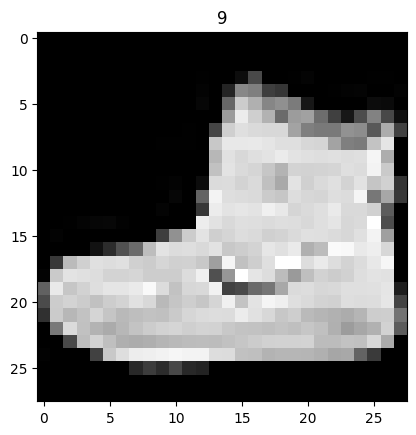

In [22]:
plt.imshow(image.squeeze(), cmap="grey")
plt.title(label)

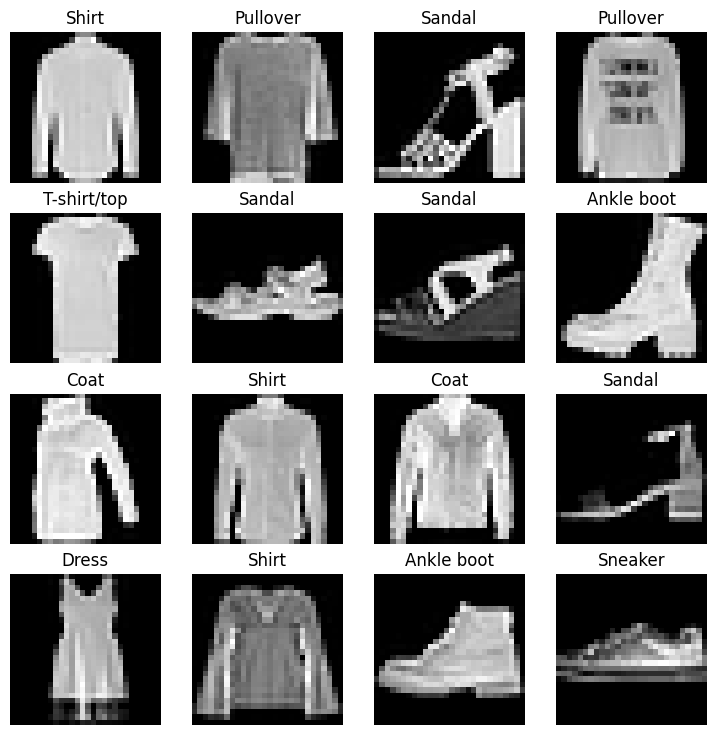

In [25]:
# Show 16 pictures
fig = plt.figure (figsize=(9,9))
rows, cols = 4, 4
for i in range (1, rows*cols + 1):
    img_index = torch.randint(0, len(train_data), size = [1]).item()
    fig.add_subplot (rows, cols, i)
    img, lbl = train_data[img_index]
    plt.imshow(img.squeeze(), cmap = 'grey')
    plt.title(train_data.classes[lbl])
    plt.axis(False)


In [ ]:
# turn data into iterable 

In [30]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset= train_data,
                              batch_size= BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)
print(train_dataloader, test_dataloader)
print (len(train_dataloader), BATCH_SIZE)
print (len (test_dataloader), BATCH_SIZE)


<torch.utils.data.dataloader.DataLoader object at 0x000001C81E131610> <torch.utils.data.dataloader.DataLoader object at 0x000001C81E1F1B50>
1875 32
313 32


In [34]:
# show each batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
tensor(6) torch.Size([])


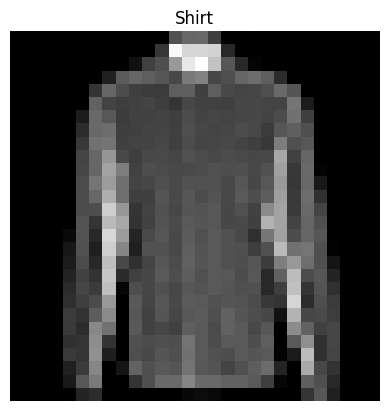

In [48]:
# show sample of 
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'grey')
plt.title (train_data.classes[label])
plt.axis(False)
print (img.shape)
print (label, label.shape)